# COMP4220: Machine Learning, Spring 2022, Assignment 5

> ## **Please submit one pdf file for all questions.**


# 1. List five hyperparameters you can tweak in a basic neural network?


In a basic neural network we can tweak is the number of layers, number of neurons per layer, activation functions, learning rate, and the batch size.   

# 2. What is backpropagation and how does it work?

Backpropagation is a method of gradient descent discored in 1986 where the gradient can be calculated in two passes through the newtwokr(one forward, and one back), and compute the gradient of the network's error in respect to each parameter.  Then it performs a step of the gradient descent (whatever step size one selects) and continues until the network converges.



# Programming Assignment (Artificial Neural Network-ANN)

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.compose import ColumnTransformer
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset. This dataset describes churning, which is
# the rate at which customers stop doing business with a company
dataset = pd.read_csv('Churn_Modelling.csv')
dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## 1. Looking at the dataset we can see that the first 3 columns are not essential for our model. 
> Make a X variable that contains all other columns except the first three columns and Exited (label) <br/>
> Make a Y variable (the Exited column) <br/>

In [3]:
X = dataset.iloc[:, 3:13].values # Select input features X 
y = dataset.iloc[:, 13].values   # The last column "Exited" is the output variable Y 

## 2. In X there are Geography and Gender columns that are in string format which we can't use for training. Thus we should transform them into numerical type to train our model.
> Use LabelEncoder and OneHotEncoder from sklearn.preprocessing to <br/>
> transform the "Geography" and "Gender" columns into numberical data type

In [4]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
ct = ColumnTransformer([("Geogrophy", OneHotEncoder(), [1])], remainder = 'passthrough')
X = ct.fit_transform(X)

## 3. Split the dataset into the Training set and Test set (test_size = 0.2)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=169)

## 4. Apply Feature Scaling to all features before training a neural network

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train,y_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
print(X_train_scaled.shape)

(8000, 12)


## 5. Let's build ANN model by using the Keras sequential package
> Initalize the sequential model <br/>
> Add the input layer and the first hidden layer <br/>
> Hint: For the first layer use (units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11)

In [15]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [36]:
classifier = Sequential()
classifier.add(keras.layers.Flatten(input_shape=[12]))
classifier.add(keras.layers.Dense(6,kernel_initializer = 'uniform', activation="relu"))

## 6. Add the second hidden layer
> Hint:(units = 6, kernel_initializer = 'uniform', activation = 'relu') 

In [37]:
classifier.add(keras.layers.Dense(6,kernel_initializer = 'uniform', activation="relu"))

## 7. Add the output layer
> Hint: (units = 1, kernel_initializer = 'uniform', activation = 'sigmoid')


In [38]:
classifier.add(keras.layers.Dense(1, kernel_initializer = 'uniform', activation="sigmoid"))

## 8. Compile the ANN
> hint: (optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']))

In [39]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## 9. Fit the ANN to the training set
> (batch_size = 5, epochs = 20)

In [49]:
batch_size = 5
epochs = 20
history = classifier.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/20
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4040 - accuracy: 0.8364
Epoch 2/20
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4017 - accuracy: 0.8366
Epoch 3/20
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4004 - accuracy: 0.8376
Epoch 4/20
1600/1600 [==============================] - 6s 4ms/step - loss: 0.4007 - accuracy: 0.8370
Epoch 5/20
1600/1600 [==============================] - 6s 4ms/step - loss: 0.3994 - accuracy: 0.8378
Epoch 6/20
1600/1600 [==============================] - 5s 3ms/step - loss: 0.3989 - accuracy: 0.8381
Epoch 7/20
1600/1600 [==============================] - 6s 4ms/step - loss: 0.3991 - accuracy: 0.8370
Epoch 8/20
1600/1600 [==============================] - 6s 3ms/step - loss: 0.3986 - accuracy: 0.8382
Epoch 9/20
1600/1600 [==============================] - 6s 4ms/step - loss: 0.3983 - accuracy: 0.8385
Epoch 10/20
1600/1600 [==============================] - 6s 4ms/step - loss: 0.398

## 10. Make predictions and evaluate the model
> hint: just consider y_pred the values where y_pred is greater than 0.5 <br/>
> (y_pred = (y_pred > 0.5)) <br/>
> Make the confusion matrix and show the result <br/>
> Evalue the precision, accuracy, recall, and f1 score and show the result <br/>

In [62]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [57]:
y_pred = classifier.predict(X_test_scaled)
y_pred = np.where(y_pred > 0.5, 1,0)

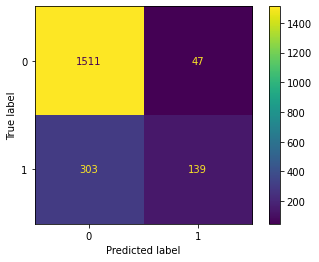

In [63]:
arr =confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(arr).plot()

## 11. Compute the accuracy, precision, recall, and f1 score

In [58]:
print('Accuracy: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {}'.format(precision_score(y_test, y_pred)))
print('Recall: {}'.format(recall_score(y_test, y_pred)))
print('F1 Score: {}'.format(f1_score(y_test, y_pred)))

Accuracy: 0.825
Precision: 0.7473118279569892
Recall: 0.31447963800904977
F1 Score: 0.44267515923566875


## 12. Using Tensorflow Playground 

Visit the TensorFlow Playground at https://playground.tensorflow.org/

Spend some time playing with this UI to grow your intuition about neural networks. Complete the following problems in a single sitting please.


1.	Layers and patterns: try training the default neural network by clicking the run button (top left). Notice how it quickly finds a good solution for the classification task. Notice that the neurons in the first hidden layer have learned simple patterns, while the neurons in the second hidden layer have learned to combine the simple patterns of the first hidden layer into more complex patterns.  What happens when you add more layers?

2.	Activation function: try replacing the Tanh activation function with the ReLU activation function, and train the network again. Notice that it finds a solution even faster, but this time the boundaries are linear. What about the ReLU function causes this?

3.	Local minima: modify the network architecture to have just one hidden layer with three neurons. Train it multiple times (to reset the network weights, click the reset button next to the play button). What do you notice about the training time?

4.	Too small: now remove one neuron to keep just 2. Notice that the neural network is now incapable of finding a good solution, even if you try multiple times. What do you observe about the number of parameters and the training set?

5.	Large enough: next, set the number of neurons to 8 and train the network several times. Notice that it is now consistently fast and never gets stuck. What do you observe about local minima?

1) Typically as I add more layers, the process takes longer to converge, however it will be able to converge to a more complex state

2)The Relu function creates a linear function as such it is fast to compute (and doesn't saturate for positive values), but linear stops curves from being formed. I would imagine Tanh is hyperbolic tangenet (unless they decided to name two different things the same thing)  so it is really good at curves, but more complicated to produce

The training time varries greatly based on the inital guesses of the neurons, sometimes it converges within 30 epochs, othertimes it is 90, sometimes in the hundreds

4)The Number of paremeters is equal to the number of neurons, so complex models cannot be obtained beyond two lines, the training set is also a bullseye which cannot be genereated by two lines...guasian data (two spots) works really well, even with one

5) The local minima is the smallest we have ever had (in the teens), as such this data can be represented really well via 8 lines being interested in some way, and does not need more levels but simply a large number of nodes